Data Set Information:
This has been collected using direct questionnaires from the patients of Sylhet Diabetes
Hospital in Sylhet, Bangladesh and approved by a doctor.

### Attribute Information:
- Age 1.20-65

- Sex - 1. Male, 2.Female

All features with values 1: Present 2: Non Present
- Polyuria (Excessive excretion of urine resulting in profuse and frequent micturition) 
- Polydipsia (excessive thirst and fluid intake)
- Sudden weight loss 
- Weakness 
- Polyphagia (exessive eating)
- Genital thrush (candidiasis infection)No.
- Visual blurring 
- Itching 
- Irritability 
- Delayed healing of wounds
- partial paresis (weakening of muscles)
- muscle stiffness
- Alopecia (hair loss)
- Obesity

- Class 1.Positive, 2.Negative.

### Citation
Islam, MM Faniqul, et al. 'Likelihood prediction of diabetes at early stage using data mining techniques.' Computer Vision and Machine Intelligence in Medical Image Analysis. Springer, Singapore, 2020. 113-125.

### Research Questions
1. What symptoms are most frequent for diabetes patients?
2. How is the distribution of the patient's age? 
3. What is the average age for each symptom present?
4. How are symptoms related to gender?
5. Build a model for the prediction of diabetes.

###  Import libraries

In [19]:
import pandas as pd
import numpy as np
import plotly.express as px

In [20]:
dataset = pd.read_csv('diabetes_data_upload.csv')

In [5]:
dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [26]:
dataset.replace({'Yes':'1','No':'0','Positive':'1','Negative':'0'},inplace=True)

In [27]:
dataset[['Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class']] = dataset[['Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class']].astype(int)

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    int32 
 3   Polydipsia          520 non-null    int32 
 4   sudden weight loss  520 non-null    int32 
 5   weakness            520 non-null    int32 
 6   Polyphagia          520 non-null    int32 
 7   Genital thrush      520 non-null    int32 
 8   visual blurring     520 non-null    int32 
 9   Itching             520 non-null    int32 
 10  Irritability        520 non-null    int32 
 11  delayed healing     520 non-null    int32 
 12  partial paresis     520 non-null    int32 
 13  muscle stiffness    520 non-null    int32 
 14  Alopecia            520 non-null    int32 
 15  Obesity             520 non-null    int32 
 16  class               520 no

### 1. What symptoms are most frequent for diabetes patients?

In [296]:
present_series = dataset.loc[dataset['class'] == 1][['Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']]

In [297]:
present_q = len(present_series)
present_series.transpose()
present_df = pd.DataFrame(positive_series.sum().T,index=None,columns=['Present'])

In [298]:
present_df['Non Present'] = present_q - present_df.Present
present_df['Percentage'] = present_df.Present / present_q
present_df = present_df.sort_values(by='Present')
present_df.index.rename('Condition',inplace=True)
present_df.reset_index(inplace=True)

In [299]:
present_df

,Condition,Present,Non Present,Percentage
0,Obesity,61,259,0.190625
1,Alopecia,78,242,0.243750
2,Genital thrush,83,237,0.259375
3,Irritability,110,210,0.343750
4,muscle stiffness,135,185,0.421875
5,delayed healing,153,167,0.478125
6,Itching,154,166,0.481250
7,visual blurring,175,145,0.546875
8,sudden weight loss,188,132,0.587500
9,Polyphagia,189,131,0.590625


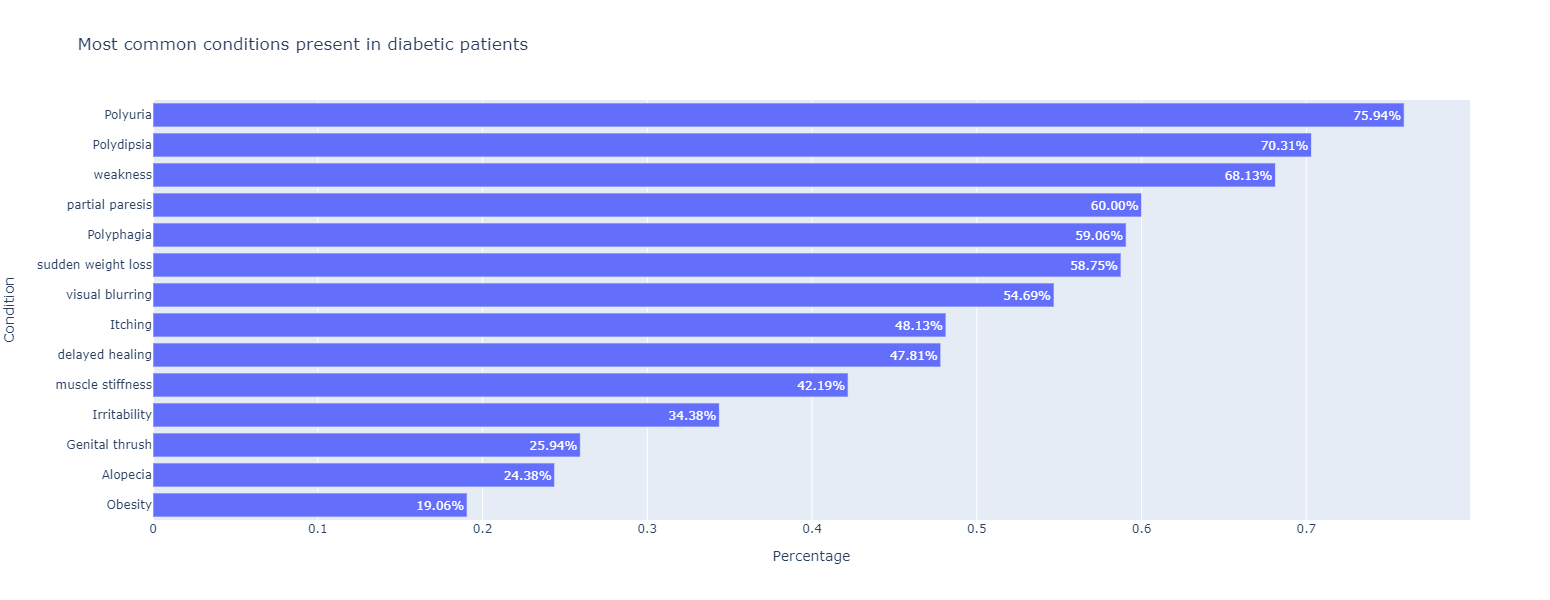

In [301]:
fig = px.bar(present_df, x='Percentage', y='Condition', text='Percentage', width=1000,height=600,title="Most common conditions present in diabetic patients")
fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

### 2. How is the distribution of the patient's age?

In [302]:
bins= [-1,0,18,40,65, 110]
labels = ['unknown','Pediatric','Young Adult','Adult', 'Ederly']
dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=False)

In [ ]:
fig = px.bar(present_df, x='Percentage', y='Condition', text='Percentage', width=1000,height=600,title="Most common conditions present in diabetic patients")
fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

### 3. What is the average age for each symptom present?

### 4. How are symptoms related to gender?

### 5. Build a model for the prediction of diabetes.

In [303]:
dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,AgeGroup
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,Adult
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,Adult
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,Adult
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,Adult
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1,Young Adult
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,Adult
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1,Adult
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,Young Adult
